USDA Emissions Data - Missoula Fire Lab Emission Inventory (MFLEI) for CONUS.
https://www.fs.usda.gov/rds/archive/catalog/RDS-2017-0039

Year - 2017
The Missoula Fire Lab Emission Inventory (MFLEI) is a retrospective, daily wildfire emission inventory for the contiguous United States with a spatial resolution of 250 meters (m). MFLEI was produced using multiple datasets of fire activity and burned area, a newly developed wildland fuels map and an updated emission factor database. This data publication contains the 2003-2015 MFLEI estimates of daily fuel consumed and emissions of CO2, CO, CH4, and PM2.5 at 250 m spatial resolution. The inventory also includes carefully constructed uncertainty estimates for daily fuel consumption and emissions at 250 m spatial resolution. The dataset includes daily emissions and uncertainties aggregated to 10 kilometer (km) × 10 km grid. The aggregated product provides area burned, mass of fuel consumed, and emissions of CO2, CO, CH4, and PM2.5. The emission and emission uncertainty data are provided as comma-delimited ASCII text files. MFLEI fuel consumption and land cover type may be combined with published emission factor datasets to estimate emissions for hundreds of volatile organic compounds and other pollutants present in fresh wildfire smoke. This data publication contains geospatial data in raster format and tabular data. The raster datasets includes a map of the coefficient of variation of the herbaceous fuel loading, a land cover map of herbaceous, shrub, and forest type groups (FIA), and maps of the upper bound, lower bound, and best estimate of herbaceous or shrub fuel loading.
 

See file format in Google Drive. 
column	variable	description
1	Id	Pixel ID
2	year	Year pixel burned 
3	Doy	Estimated day of year pixel burned 
4	Longitude	Longitude of pixel center in decimal degree
5	Latitude	Latitude of pixel center in decimal degree
6	Grid10k	Index of 10 km grid to be used in a future dataset of aggregated emissions
7	Covertype	0 = Unclassified/Open Water/ Perennial Ice/Snow/Barren Land; 1 = herbaceous; 2 = shrub/scrub; 3 = forest; 21-24 = deveolped; 81 = hay/pasture; 82 = cultivated crop; 90 = woody wetlands; 95 = emergent herbaceous wetlands
8	Fuelcode	See Table 1 in accompanying data document
9	Area_burned	Burned area 
10	Prefire_fuel	Pre-fire dry mass of fuel
11	Consumed_fuel	Dry mass of fuel consumed by fire
12	ECO2	CO2 emission intensity
13	ECO	CO emission intensity
14	ECH4	CH4 emission intensity
15	EPM2.5	PM2.5 emission intensity
16	Cwd_frac	Mass fraction of fuel consumed (consumed_fuel) that was coarse woody debris 
17	Duff_frac	Mass fraction of fuel consumed (consumed_fuel) that was duff 
18	Fuel_moisture_class	Code for fuel moisture class: 1 = very dry; 2 = dry; 3 = moderate; 4 = moist (see Table 7 of accompanying data document)
19	Burn_source	Source of fire activity data that identified this pixel as burned. 1 = MTBS; 2 = MCD64; 3 = GEOMAC; 4 = FOD
20	Burnday_source	Source or method used to estimate day of year pixel burned. See accompanying data document for details.  12 = MCD64; 15 = MCD14; 17=VIIRS; 77 = No valid burn days for the fire event and no containment date. Fire duration and burn days filled using fire size based burn day distribution.  78 = No valid burn days for the fire event but a valid containment date exists. Burn days filled using fire size based burn day distribution. 81 = Fire event has one or more valid burn day (code 12 or 15). Burn days filled based on distance to pixels with valid burn days
21	BSEV	Thematic burn severity classification
22	BSEV_flag	Value of 1 indicates that the BSEV value was estimated using methods described in accompanying data document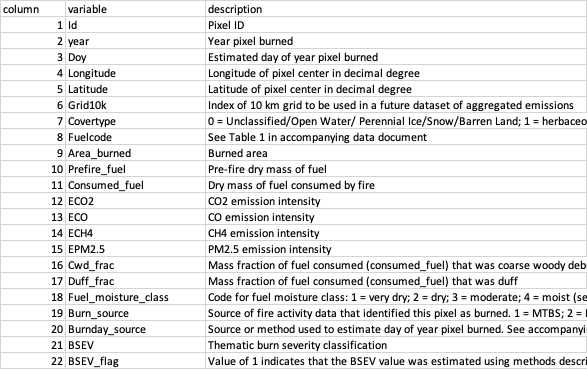

In [ ]:
### Combine all csv's in a directory, into a new file. 

import os
import glob
import pandas as pd
os.chdir('/Users/AlfHaugen/Python/Wildfire_Data/Missoula Emisions Data RDS-2017-0039/Emissions_Year')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

###combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
###export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [1]:
### Loading file into dataframe.
import pandas as pd
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

In [49]:
emdata.head(3)

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
0,0,2008,359,-81.0384,25.1958,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0
1,1,2008,359,-81.0404,25.1984,4536,3,1600,62500.0,6220.097576,...,157.185824,4.593092,24.292355,0.022757,0.080441,3,1,81,2,0
2,2,2008,359,-81.0380,25.1981,4536,3,1600,0.0,6220.097576,...,153.981344,4.499455,23.797117,0.023231,0.082115,3,1,81,1,0


In [3]:
### Checking to see that all years were combined to file.
emdata['year'].unique()

array([2008, 2009, 2013, 2007, 2006, 2012, 2004, 2010, 2011, 2005, 2015,
       2014, 2003])

In [58]:
### Creating Variable: creating a variable to toggle/limit the dataset to one year/ while moving the long. and lat. to the west coast 
### (see below)

emyear2003 = emdata[(emdata.year == 2003) & (emdata.latitude > 34) & (emdata.longitude < -114)]
emyear2003[1:10]

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
6899728,69909,2003,231,-117.1740,34.0013,53519,2,2,0.0,198.952650,...,12.534017,0.479874,1.826385,0.0,0.0,2,1,15,1,0
6899729,69910,2003,231,-117.1713,34.0018,53519,2,2,0.0,192.900006,...,12.152700,0.465275,1.770822,0.0,0.0,2,1,15,1,0
6899746,69927,2003,231,-117.1746,34.0034,53519,2,2,0.0,137.417436,...,8.657298,0.331451,1.261492,0.0,0.0,2,1,15,1,0
6899747,69928,2003,231,-117.1719,34.0039,53519,82,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,2,1,15,1,0
6899811,69992,2003,295,-117.2408,34.0003,53518,2,2,62500.0,209.600820,...,13.204852,0.505557,1.924136,0.0,0.0,3,1,15,3,0
6899824,70005,2003,295,-117.2521,34.0005,53518,2,2,62500.0,233.026794,...,14.680688,0.562061,2.139186,0.0,0.0,3,1,15,3,0
6899825,70006,2003,295,-117.2494,34.0010,53518,2,2,62500.0,213.860088,...,13.473186,0.515831,1.963236,0.0,0.0,3,1,15,3,0
6899826,70007,2003,295,-117.2467,34.0015,53518,1,1,0.0,141.452532,...,9.208560,0.352556,1.341819,0.0,0.0,3,1,15,1,0
6899827,70008,2003,295,-117.2441,34.0020,53518,2,2,0.0,216.998496,...,13.670905,0.523400,1.992046,0.0,0.0,3,1,15,1,0


In [59]:
# Checking data shape for variable year. 
emyear2003.shape

(100308, 22)

In [60]:
emdata.shape

(7254534, 22)

In [61]:
emyear2003[['ECO2', 'ECO', 'ECH4', 'EPM2.5']].agg(['mean','min','max','count'])

,ECO2,ECO,ECH4,EPM2.5
mean,4194.321736,332.325324,18.234663,56.317688
min,0.000000,0.000000,0.000000,0.000000
max,14905.949251,1275.734395,71.748070,218.697325
count,100308.000000,100308.000000,100308.000000,100308.000000


Mapping - initial map showed fires all over america, therefore you may input smaller dataframes using the variables above to hone in on year and geographical area.   

Notes - changes to matplotlib - color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12

Mapping ideas - https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

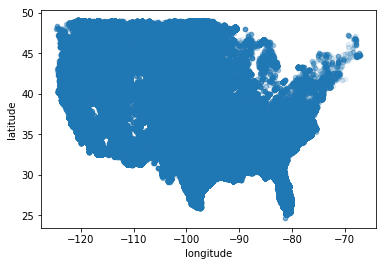

In [78]:
### Using variable dataset e.g., the entire set or 
import matplotlib.pyplot as plt
emdata.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [ ]:
### Another plot to overlay intensity... in progress...
emdata.plot(kind="scatter", x="longitude", y="latitude",
    s=emdata['population']/100, label="population",
    c="prefire_fuel", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

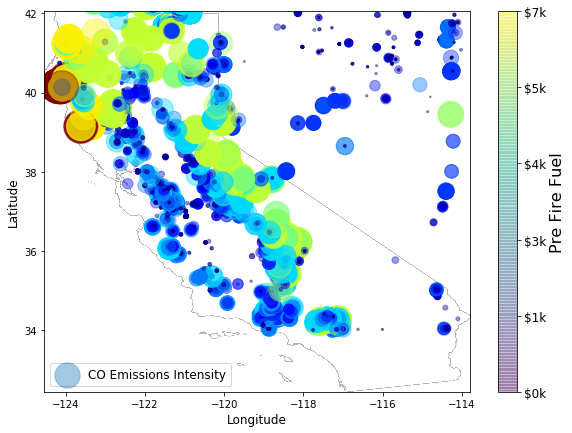

In [77]:
### Same as plot above, but overlaying onto a map. 
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('/Users/AlfHaugen/Python/Wildfire_Data/californiamap.png')
ax = emyear2003.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=emyear2003['ECO'], label="CO Emissions Intensity",
                       c="prefire_fuel", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)

prices = emyear2003["prefire_fuel"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=12)
cbar.set_label('Pre Fire Fuel', fontsize=16)

plt.legend(fontsize=12)
plt.show()

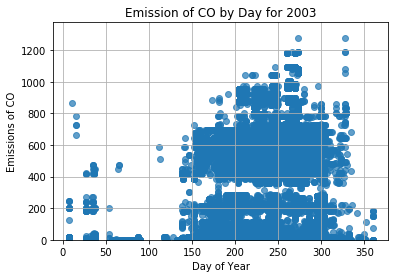

In [98]:

#def graph_data(path, xkey='doy', ykey='eco'):
data = emyear2003
xval = data['doy']
yval = data['ECO']
#Year = emyear2003['year']

fig,axe = plt.subplots()
plt.scatter(xval, yval, alpha=0.7)
plt.ylim([0, data['ECO'].max()+100])

plt.ylabel('Emissions of CO')
plt.xlabel('Day of Year')
plt.title('Emission of CO by Day for 2003') 
#+ str(Year))

plt.grid(True)
plt.show()

#graph_data(emyear2003) # Or whatever your path is